In [11]:
%matplotlib inline
import random, pylab, math, numpy, os
import mpl_toolkits.mplot3d

In this homework set, we study Bose-Einstein condensation in a three-dimensional harmonic trap. After a start with two preparation programs, you then consider the implementation of a Markov chain Monte Carlo approach where you will obtain the distribution of x-positions. You then consider the anharmonic trap.

# A

In this section we provide two easy Preparation programs about histograms.

### Preparation program 1

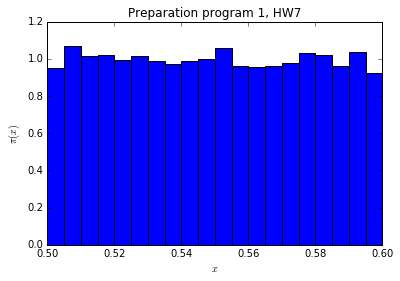

In [12]:
import random, pylab
data = []
for run in range(100000):
    data.append(random.uniform(0.0, 1.0))
pylab.title('Preparation program 1, HW7')
pylab.hist(data, bins=200, normed=True)
pylab.xlim(0.5,0.6)
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$')
pylab.show()

### Preparation program 2

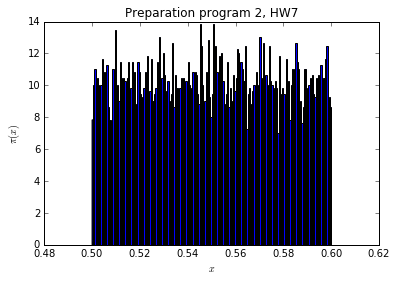

In [13]:
import random, pylab
data = []
for run in range(100000):
    data.append(random.uniform(0.0, 1.0))
pylab.title('Preparation program 2, HW7')
pylab.hist(data, bins=200, range=[0.5, 0.6], normed=True)
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$')
pylab.show()

## A1 

## QUESTIONS

1. What is the distribution of "data" in Preparation program 1? What is put into the histogram? What is the distribution shown?
2. What is the distribution of "data" in Preparation program 2? What is put into the histogram? What is the distribution shown?

## Answers

1. Data contain random samples in interval form 0.0 to 1.0 with uniform probability for any number within interval. In plot of histogram we put normalized distribution of samples across interval from 0.0 to 1.0, where we show only histogram for samples between 0.5 and 0.6. (so that we observe what we would expect for uniform distribution, same value for each position and equal to 1.0 since then area of whole histogram is 1.0)

2. In second example data are same as in first case, howvever this time we only select data in interval between 0.5 and 0.6 for ploting and normalization. So that we divided interval 0.5-0.6 into much more bins so that statistics in bins is more noisy and due to normalization also mean value is shifted to 10.0 so that 0.1\*10 is 1 again.

# B

In this section, you will set up a Monte Carlo programs for bosons in a three-dimensional harmonic trap.

In [15]:
import random, math, pylab
def levy_harmonic_path(k, beta):
    xk = tuple([random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0))) for d in range(3)])
    x = [xk]
    for j in range(1, k):
        Upsilon_1 = 1.0 / math.tanh(beta) + 1.0 / math.tanh((k - j) * beta)
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta) + xk[d] / math.sinh((k - j) * beta) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1 for d in range(3)]
        sigma = 1.0 / math.sqrt(Upsilon_1)
        dummy = [random.gauss(x_mean[d], sigma) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm(x, xp, beta):
    Upsilon_1 = sum((x[d] + xp[d]) ** 2 / 4.0 * math.tanh(beta / 2.0) for d in range(3))
    Upsilon_2 = sum((x[d] - xp[d]) ** 2 / 4.0 / math.tanh(beta / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 512
T_star = 0.8
beta = 1.0 / (T_star * N ** (1.0 / 3.0))
nsteps = 100000
positions = {}
for k in range(N):
    a = levy_harmonic_path(1, beta)
    positions[a[0]] = a[0]
for step in range(nsteps):
    boson_a = random.choice(positions.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
            boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path(k, beta)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for k in range(len(perm_cycle) - 1):
        positions[perm_cycle[k]] = perm_cycle[k + 1]
    a_1 = random.choice(positions.keys())
    b_1 = positions.pop(a_1)
    a_2 = random.choice(positions.keys())
    b_2 = positions.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2

## B1 

Now modify the above program so that it reads from and writes to file the keys and values of the dictionary positions. This is analogous to what was done in HW3. Here is the snippet that reads the dictionary "positions"....

In [39]:
positions = {}
filename = 'boson_configuration.txt'
if os.path.isfile(filename):
    f = open(filename, 'r')
    for line in f:
        a = line.split()
        positions[tuple([float(a[0]), float(a[1]), float(a[2])])] = tuple([float(a[3]), float(a[4]), float(a[5])])
    f.close()
    if len(positions) != N: 
        exit('error input file')
    print 'starting from file', filename
else:
    for k in range(N):
        a = levy_harmonic_path(1, beta)
        positions[a[0]] = a[0]
    print 'starting from scratch (' + filename + ' not found)'

starting from scratch (boson_configuration.txt not found)


True

In [34]:
def readPosition(filePath, N, beta):
    positions = {}
    if os.path.isfile(filePath):
        f = open(filePath, 'r')
        for line in f:
            a = line.split()
            positions[tuple([float(a[0]), float(a[1]), float(a[2])])] = tuple([float(a[3]), float(a[4]), float(a[5])])
        f.close()
        if len(positions) != N: 
            exit('error input file')
        print 'starting from file', filePath
    else:
        for k in range(N):
            a = levy_harmonic_path(1, beta)
            positions[a[0]] = a[0]
        print 'starting from scratch (' + filePath + ' not found)'
    return positions

def writePositions(filePath, positions):
    f = open(filePath, 'w')
    for key in positions.keys():
        for i in key:
            f.write("%.20f\t"%(i))
#            print "%.20f"%(i),
        for i in positions[key]:
            f.write("%.20f\t"%(i))
#            print "%.20f"%(i),
        f.write("\n")
#        print 
    f.close()

#positions = readPosition("aa", 5)
#writePositions("aaa", positions)

In [36]:
#new version
N = 512
T_star = 0.8
beta = 1.0 / (T_star * N ** (1.0 / 3.0))
nsteps = 100000
# loead file input if present
positions = readPosition("aTest", N, beta)
for step in range(nsteps):
    boson_a = random.choice(positions.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
            boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path(k, beta)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for k in range(len(perm_cycle) - 1):
        positions[perm_cycle[k]] = perm_cycle[k + 1]
    a_1 = random.choice(positions.keys())
    b_1 = positions.pop(a_1)
    a_2 = random.choice(positions.keys())
    b_2 = positions.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2
# save data to file
writePositions("aTest", positions)

starting from file aTest


## QUESTIONS
1. On line 8 of this snippet, you find the line "positions[tuple... ". Explain exactly what this line does: what "a" is exactly, what "positions" is, why there is a "tuple"
2. Explain the line immediately following "tuple([float(a[3]), ...". 

## Answers

1. Well "a" is python list that contain separet parts of line from file where each part element of list was separated by white space character(s) in original line. Positions is dictionary where keys are tuples of float numbers. Tuples are used as keys since they are immutable, and tuples of float numbers are.

2. Well here we take strings from a[] and convert then to float since they are suppose to be number representations, then we create list to these float numbers and conver it to tuple by tuple([.., .., ..]). (If the question is about next line then f.close() just empty buffer to file and close it properly.)

Here is the snippet for writing to file, at the end of the simulation run, so that it can be read into the
next iteration:

In [ ]:
f = open(filename, 'w')
for a in positions:
    b = positions[a]
    f.write(str(a[0]) + ' ' + str(a[1]) + ' ' + str(a[2]) + ' ' + 
            str(b[0]) + ' ' + str(b[1]) + ' ' + str(b[2]) + '\n')
f.close()

## B2

## QUESTIONS

Using the program introduced above, produce two histograms and one plot, for N=512, and T_star = 0.8, all on the same figure, as follows:
1. The first histogram should give the normed distribution of the x-position of particles (normed over all x), and show it between x = -3 and x = 3 (Remember the Preparation programs).
2. The second histogram should produce the normed distribution of the x-position of the particles which are on
cycles of length larger than cycle_min. ATTENTION: Note that you need two lists of data, one for each histogram. For the second histogram, so **not** add all the elements of the cycle perm_cycle to the data list, add only the x coordinate of the **first element**!
3. Finally, compare the first and the second histogram to the squared ground-state wave function of the harmonic oscillator, psi^2 (x) = exp(-x^2)/sqrt(pi). Display your results for cycle_min = 10 in one figure.
4. Explain why the two histograms give different results
5. Explain why one of the histograms can be compared to the squared ground state wave function, but only if cycle_min is sufficiently large.

HINT: For question 2, two lines, such as:

if k > cycle_min:
    data_long.append(perm_cycle[0][0])
    
is all that it takes - this corresponds to 1/ pick a particle 2/ check its cycle length 3/ if k > cycle_min: add to data_long).

NB: Make sure you use what you learned in Preparation programs 1 and 2 to restrict the range of x values displayed in your histogram to the range -3 < x < 3.

NB: Use labels and legends to distinguish the three data sets, use the "alpha" keyword in pylab.hist to make the histograms semi-transparent (alpha = 0.5).

In [54]:
N = 512
T_star = 0.8
nsteps = 500000
beta = 1.0 / (T_star * N ** (1.0 / 3.0))

data=[]
data_long=[]
cycle_min = 10

# loead file input if present
positions = readPosition("B2", N, beta)
for step in range(nsteps):
    boson_a = random.choice(positions.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
            boson_a = boson_b
    k = len(perm_cycle)
    data.append(perm_cycle[0][0])
    if k >= cycle_min :
        data_long.append(perm_cycle[0][0])
    perm_cycle = levy_harmonic_path(k, beta)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for k in range(len(perm_cycle) - 1):
        positions[perm_cycle[k]] = perm_cycle[k + 1]
    a_1 = random.choice(positions.keys())
    b_1 = positions.pop(a_1)
    a_2 = random.choice(positions.keys())
    b_2 = positions.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2
# save data to file
#writePositions("aTest", positions)

starting from scratch (B2 not found)


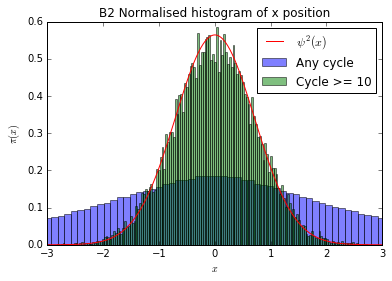

In [64]:
x = numpy.arange(-3.0, 3.0, 0.01)
f = numpy.exp(-1.0*(x**2))/numpy.sqrt(numpy.pi)

pylab.title('B2 Normalised histogram of x position')
histData = pylab.hist(data, alpha=0.5, bins=200, normed=True, label='Any cycle')
histDataLong = pylab.hist(data_long, alpha=0.5, bins=200, normed=True, label='Cycle >= 10')
Function = pylab.plot(x, f, label='$\psi^2(x)$')
pylab.xlim(-3,3)
pylab.legend()
pylab.xlabel('$x$')
pylab.ylabel('$\\pi(x)$')
pylab.show()

(4) Probability of permutation/exchange between two particles rise with decrease of their distance so that particles that are in longer cycles had to be more localize, closer to each other, this way distribution of x positions for particles in longer cycles tend to be more narrow.

(5) Well since higher cycles effectively behave as if they were at higher beta (at lower temperatures), and at low temperatures all bosons tend to be at ground state.

## B3 

## QUESTIONS

Using the program from section B2,
1. Generate the probability for a particle to be in a cycle of length k. This is simply the histogram of 'perm_cycle'. 2. Plot this distribution at temperature T* = 0.6, N= 512 (Use pylab.ylim(...) to zoom in on the distribution for$ 0< y < 0.01$.)
3. Can you confirm that the probability distribution for a particle to be on a cycle of length $k$ is independent of $k$, in a wide range of k values?
4. Explain what you did to obtain that histogram.. 

NB: Notice that, after debugging the program, you should run it several times to get a good initial start. Then let it run for 15 minutes (if you can) to produce final output.

In [91]:
N = 512
T_star = 0.6
nsteps = 500000
beta = 1.0 / (T_star * N ** (1.0 / 3.0))

data_k = []

# loead file input if present
positions = readPosition("B3_7", N, beta)
for step in range(nsteps):
    boson_a = random.choice(positions.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
            boson_a = boson_b
    k = len(perm_cycle)
    data_k.append(k)
    perm_cycle = levy_harmonic_path(k, beta)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for k in range(len(perm_cycle) - 1):
        positions[perm_cycle[k]] = perm_cycle[k + 1]
    a_1 = random.choice(positions.keys())
    b_1 = positions.pop(a_1)
    a_2 = random.choice(positions.keys())
    b_2 = positions.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1] = b_2
        positions[a_2] = b_1
    else:
        positions[a_1] = b_1
        positions[a_2] = b_2
# save data to file
writePositions("B3_7", positions)

starting from file B3_7


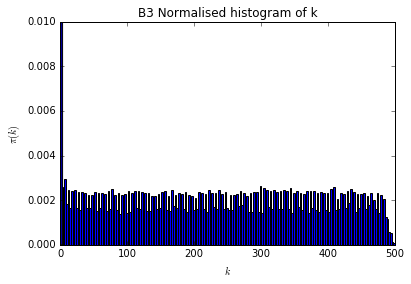

In [92]:
pylab.title('B3 Normalised histogram of k')
pylab.hist(data_k, bins=200, normed=True, label='')
#Function = pylab.plot(x, f, label='$\psi^2(x)$')
pylab.ylim(0,0.01)
pylab.legend()
pylab.xlabel('$k$')
pylab.ylabel('$\\pi(k)$')
pylab.show()

(2) From histogram of cycle lengths we can see that probability of k is independent of k, for cycles above 1-5 till max length of cycle given by number of particles.

(3) Just modified code to sample cycles length on each random selection of particle, so that histogram of probabilities for particle being in cycle of length k was sampled.

# C

Each year, numerous research papers are published on "cigar-shaped" and on "pancake-shaped" Bose-Einstein condensates (just google to convince yourself!). The first ones, in a limit, reduce to one-dimensional condensates, and the second ones are close to two-dimensional condensates. To study them, use the below program, which gives the functions levy_harmonic_path for spring constants (omega_x, omega_y, omega_z).

omega:  [1.0, 5.0, 1.0]


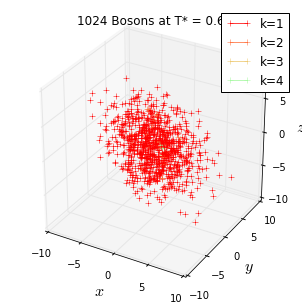

In [93]:
omega = [4.0, 4.0, 1.0] # example, please adapt
omega = [1.0, 5.0, 1.0] # example, please adapt

def levy_harmonic_path(k, beta):
    sigma = [1.0 / math.sqrt(2.0 * omega[d] * math.tanh(0.5 * k * beta * omega[d])) for d in xrange(3)]
    xk = tuple([random.gauss(0.0, sigma[d]) for d in xrange(3)])
    x = [xk]
    for j in range(1, k):
        Upsilon_1 = [1.0 / math.tanh(beta * omega[d]) + 
                     1.0 / math.tanh((k - j) * beta * omega[d]) for d in range(3)]
        Upsilon_2 = [x[j - 1][d] / math.sinh(beta * omega[d]) + \
                     xk[d] / math.sinh((k - j) * beta * omega[d]) for d in range(3)]
        x_mean = [Upsilon_2[d] / Upsilon_1[d] for d in range(3)]
        sigma = [1.0 / math.sqrt(Upsilon_1[d] * omega[d]) for d in range(3)]
        dummy = [random.gauss(x_mean[d], sigma[d]) for d in range(3)]
        x.append(tuple(dummy))
    return x

def rho_harm(x, xp, beta):
    Upsilon_1 = sum(omega[d] * (x[d] + xp[d]) ** 2 / 4.0 * math.tanh(beta * omega[d] / 2.0) for d in range(3))
    Upsilon_2 = sum(omega[d] * (x[d] - xp[d]) ** 2 / 4.0 / math.tanh(beta * omega[d] / 2.0) for d in range(3))
    return math.exp(- Upsilon_1 - Upsilon_2)

N = 1024
nsteps = 50000
omega_harm = 1.0
for d in range(3):
    omega_harm *= omega[d] ** (1.0 / 3.0)

T_star = 0.6
T = T_star * omega_harm * N ** (1.0 / 3.0)
beta = 1.0 / T
positions = {}

print 'omega: ', omega

for k in range(N):
    a = levy_harmonic_path(1, beta)
    positions[a[0]] = a[0]
for step in range(nsteps):
    boson_a = random.choice(positions.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
            boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path(k, beta)
    positions[perm_cycle[-1]] = perm_cycle[0]
    for j in range(len(perm_cycle) - 1):
        positions[perm_cycle[j]] = perm_cycle[j + 1]
    a_1 = random.choice(positions.keys())
    b_1 = positions.pop(a_1)
    a_2 = random.choice(positions.keys())
    b_2 = positions.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions[a_1], positions[a_2] = b_2, b_1
    else:
        positions[a_1], positions[a_2] = b_1, b_2
    
    
    
fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
ax.set_aspect('equal')
n_colors = 8
list_colors = pylab.cm.rainbow(numpy.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = positions_copy.keys()[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson:
            break
        else:
            boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)

pylab.title(str(N) + ' Bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 10.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.savefig('Boson_configuration')
pylab.show()

## C1

Modify this program so that it allows you to do input and output, as in section B1. Run the program several times at temperature $T^* = 0.6$ for 1024 particles. Use two sets of parameters:

In [94]:
omega = [1.0, 5.0, 1.0]
omega = [4.0, 4.0, 1.0]

In [100]:
omega = [1.0, 5.0, 1.0]

N = 1024
nsteps = 100000
omega_harm = 1.0
for d in range(3):
    omega_harm *= omega[d] ** (1.0 / 3.0)

T_star = 0.6
T = T_star * omega_harm * N ** (1.0 / 3.0)
beta = 1.0 / T
print 'omega: ', omega

# loead file input if present
positions_1 = readPosition("C1_7_1", N, beta)

for step in range(nsteps):
    boson_a = random.choice(positions_1.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions_1.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
            boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path(k, beta)
    positions_1[perm_cycle[-1]] = perm_cycle[0]
    for j in range(len(perm_cycle) - 1):
        positions_1[perm_cycle[j]] = perm_cycle[j + 1]
    a_1 = random.choice(positions_1.keys())
    b_1 = positions_1.pop(a_1)
    a_2 = random.choice(positions_1.keys())
    b_2 = positions_1.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions_1[a_1], positions_1[a_2] = b_2, b_1
    else:
        positions_1[a_1], positions_1[a_2] = b_1, b_2
    
# save data to file
writePositions("C1_7_1", positions_1)    

omega:  [1.0, 5.0, 1.0]
starting from file C1_7_1


<IPython.core.display.Javascript object>


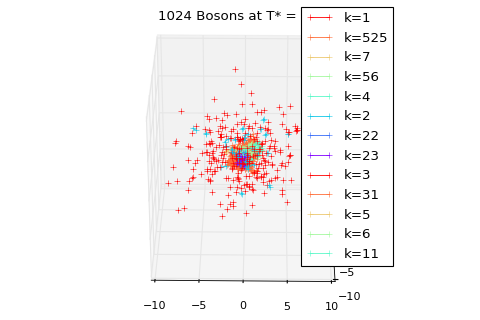

In [112]:
%matplotlib notebook

fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
ax.set_aspect('equal')
n_colors = 8
list_colors = pylab.cm.rainbow(numpy.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions_1.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = positions_copy.keys()[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson:
            break
        else:
            boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)

pylab.title(str(N) + ' Bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 10.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.savefig('Boson_configuration')
pylab.show()

<IPython.core.display.Javascript object>


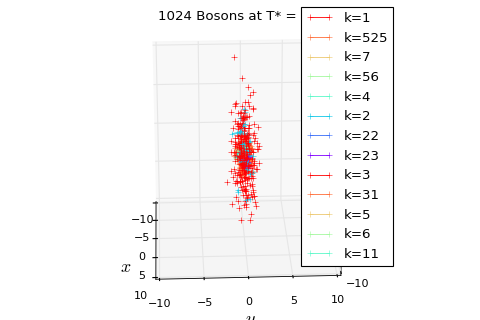

In [114]:
%matplotlib notebook

fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
ax.set_aspect('equal')
n_colors = 8
list_colors = pylab.cm.rainbow(numpy.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions_1.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = positions_copy.keys()[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson:
            break
        else:
            boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)

pylab.title(str(N) + ' Bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 10.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.savefig('Boson_configuration')
pylab.show()

In [104]:
omega = [4.0, 4.0, 1.0]

N = 1024
nsteps = 100000
omega_harm = 1.0
for d in range(3):
    omega_harm *= omega[d] ** (1.0 / 3.0)

T_star = 0.6
T = T_star * omega_harm * N ** (1.0 / 3.0)
beta = 1.0 / T
print 'omega: ', omega

# loead file input if present
positions_2 = readPosition("C1_7_2", N, beta)

for step in range(nsteps):
    boson_a = random.choice(positions_2.keys())
    perm_cycle = []
    while True:
        perm_cycle.append(boson_a)
        boson_b = positions_2.pop(boson_a)
        if boson_b == perm_cycle[0]:
            break
        else:
            boson_a = boson_b
    k = len(perm_cycle)
    perm_cycle = levy_harmonic_path(k, beta)
    positions_2[perm_cycle[-1]] = perm_cycle[0]
    for j in range(len(perm_cycle) - 1):
        positions_2[perm_cycle[j]] = perm_cycle[j + 1]
    a_1 = random.choice(positions_2.keys())
    b_1 = positions_2.pop(a_1)
    a_2 = random.choice(positions_2.keys())
    b_2 = positions_2.pop(a_2)
    weight_new = rho_harm(a_1, b_2, beta) * rho_harm(a_2, b_1, beta)
    weight_old = rho_harm(a_1, b_1, beta) * rho_harm(a_2, b_2, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        positions_2[a_1], positions_2[a_2] = b_2, b_1
    else:
        positions_2[a_1], positions_2[a_2] = b_1, b_2
    
# save data to file
writePositions("C1_7_2", positions_2)    

omega:  [4.0, 4.0, 1.0]
starting from file C1_7_2


<IPython.core.display.Javascript object>


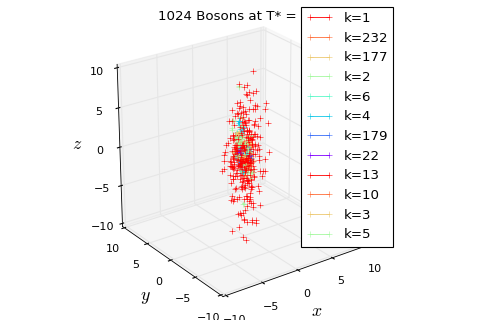

In [106]:
%matplotlib notebook

fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
ax.set_aspect('equal')
n_colors = 8
list_colors = pylab.cm.rainbow(numpy.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions_2.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = positions_copy.keys()[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson:
            break
        else:
            boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)

pylab.title(str(N) + ' Bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 10.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.savefig('Boson_configuration')
pylab.show()

<IPython.core.display.Javascript object>


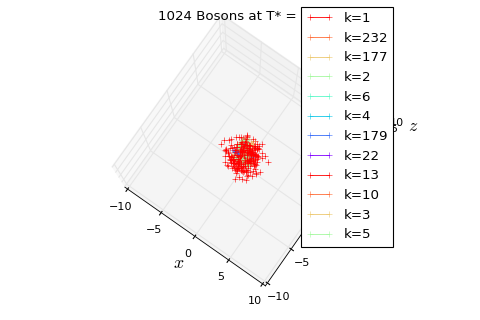

In [115]:
%matplotlib notebook

fig = pylab.figure()
ax = mpl_toolkits.mplot3d.axes3d.Axes3D(fig)
ax.set_aspect('equal')
n_colors = 8
list_colors = pylab.cm.rainbow(numpy.linspace(0, 1, n_colors))[::-1]
dict_colors = {}
i_color = 0
positions_copy = positions_2.copy()
while positions_copy:
    x, y, z = [], [], []
    starting_boson = positions_copy.keys()[0]
    boson_old = starting_boson
    while True:
        x.append(boson_old[0])
        y.append(boson_old[1])
        z.append(boson_old[2])
        boson_new = positions_copy.pop(boson_old)
        if boson_new == starting_boson:
            break
        else:
            boson_old = boson_new
    len_cycle = len(x)
    if len_cycle > 2:
        x.append(x[0])
        y.append(y[0])
        z.append(z[0])
    if len_cycle in dict_colors:
        color = dict_colors[len_cycle]
        ax.plot(x, y, z, '+-', c=color, lw=0.75)
    else:
        color = list_colors[i_color]
        i_color = (i_color + 1) % n_colors
        dict_colors[len_cycle] = color
        ax.plot(x, y, z, '+-', c=color, label='k=%i' % len_cycle, lw=0.75)

pylab.title(str(N) + ' Bosons at T* = ' + str(T_star))
pylab.legend()
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
xmax = 10.0
ax.set_xlim3d([-xmax, xmax])
ax.set_ylim3d([-xmax, xmax])
ax.set_zlim3d([-xmax, xmax])
pylab.savefig('Boson_configuration')
pylab.show()

## QUESTIONS

1. which of the two choices corresponds to the "cigar-shaped" trap? (Run the simulation for 5 or 10 minutes, and display the corresponding output under different angles, so that you clearly show that we are looking at a cigar.) 
2. which of the two choices corresponds to the "pancake-shaped" trap? (Run the simulation for 5 or 10 minutes, and display the corresponding output under different angles, so that you clearly show that we are looking at a cigar.)
3. Can you confirm that Bose-Einstein condensation sets in at $T \sim 0.9 * (\omega_x * \omega_y * \omega_z)^{1/3} * N^{1/3}$ for both choices of $\omega_x$, $\omega_y$, $\omega_z$? Run your codes for different temperatures, and relate your findings, briefly. (Don't write a master's thesis on the subject, just do two brief calculations for example at T* = 1.2, to check that the formula seems OK. Notice the relation between permutation cycles (shown in the legend) and the Bose-Einstein condensation).

NB: if you are unable to get mpl_toolkits.mplot3d.axes3d.Axes3D to run, simply produce histograms in
two-dimensional cuts in xy, xz, and yz.

## Answers

1. "Cigar-shaped" is for omega = [4.0, 4.0, 1.0]

2. "Pancake-shaped" is for omega = [1.0, 5.0, 1.0]

